## Практические примеры кластеризации

### Olivetti Faces

Посмотрим на более сложный пример - лица. Используем датасет [Olivetti Faces](https://scikit-learn.org/0.19/datasets/olivetti_faces.html), доступный из Scikit Learn:

In [1]:
import sklearn as sk
import sklearn.model_selection
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)
faces.shape

(400, 4096)

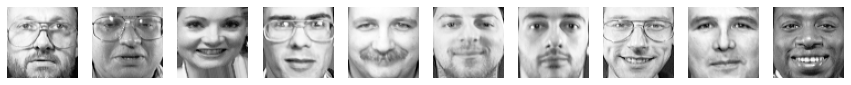

In [19]:
fig,ax = plt.subplots(1,10,figsize=(15,5))
for i in range(10):
    ax[i].imshow(-faces[i].reshape(64,64),cmap='Greys')
    ax[i].axis('off')
plt.show()

Применим алгоритм кластеризации K-means и построим центроиды:

c:\winapp\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


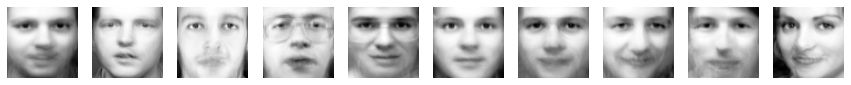

In [20]:
model = sk.cluster.KMeans(n_clusters=40).fit(faces)

fig,ax = plt.subplots(1,10,figsize=(15,5))
for i in range(10):
    ax[i].imshow(-model.cluster_centers_[i].reshape(64,64),cmap='Greys')
    ax[i].axis('off')
plt.show()

Исследуем изображение отдельных классов:

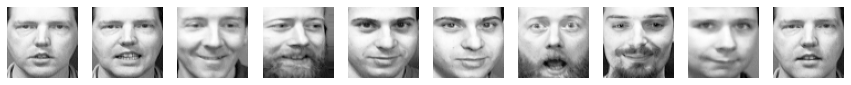

In [21]:
c = 0
res = [ x for x,l in zip(faces,model.labels_) if l==c]

fig,ax = plt.subplots(1,min(10,len(res)),figsize=(15,5))
for i,im in enumerate(res[:10]):
    ax[i].imshow(-im.reshape(64,64),cmap='Greys')
    ax[i].axis('off')
plt.show()

### Основные цвета на фотографии

Рассмотрим такую фотографию:

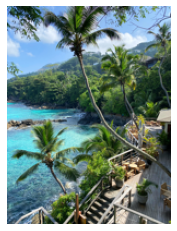

In [22]:
from PIL import Image

img = Image.open("../../../data/datingscout-u7nxI32spEk-unsplash.jpg")
img = img.resize((150,200))
img = np.array(img)/255.0
plt.imshow(img)
plt.axis('off')
plt.show()

Визуально мы видим, что на ней есть много зелёного (пальмы) и голубого (небо, вода) цветов. Если мы хотим повестить фото так, чтобы оно гармонировало с окружающими цветами, то нужно подбирать цвета из соответствующей цветовой гаммы.
Возникает вопрос – как выделить основные цвета фотографии? Если просто усреднить цвета, результат будет не слишком хорош:


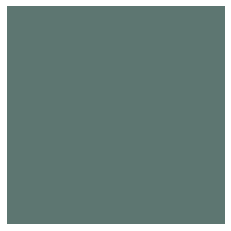

In [23]:
def show_color(c,ax=plt):
    t = np.zeros(shape=(10,10,3))
    t[:] = c
    ax.imshow(t)
    ax.axis('off')
    
show_color(img.mean(axis=(0,1)))

Для выделение индивидуальных цветов можно применить кластеризацию. В этом случае метрикой близости будет естественное евклидово расстояние между RGB-векторами цветов:

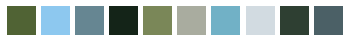

In [24]:
n_clusters = 10

X = img.reshape(-1,3)
km = sk.cluster.KMeans(n_clusters=n_clusters).fit(X)

fig,ax = plt.subplots(1,n_clusters)
for i in range(n_clusters):
    show_color(km.cluster_centers_[i],ax[i])

Остаётся вопрос - как в этом случае определить оптимальное число кластеров? Об этом мы поговорим чуть позже.

### Aнализируем страны

В качестве примера исследования данных возьмём [датасет данных по странам](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data), и посмотрим, сможем ли мы сделать какие-то интересные выводы.

In [29]:
import pandas as pd
df = pd.read_csv('../../../data/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Описание полей из этой таблицы:
* `child_mort` - количество смертей детей до 5 лет, на 1000 чел.
* `exports` - процент валового национального продукта, приходящийся на экспорт
* `health` - процент валового национального продукта, приходящийся на уход за здоровьем
* `imports` - процент валового национального продукта, приходящийся на импорт
* `Income` - доход на душу населения
* `Inflation` - инфляция, рост общего национального продукта год к году
* `life_expec` - средняя продолжительность жизни 
* `total_fer` - количество детей, рожденных в среднем каждой женщиной
* `gdpp` - валовый национальный продукт


In [30]:
df.describe().T[['mean','min','max']]

,mean,min,max
child_mort,38.270060,2.6000,208.00
exports,41.108976,0.1090,200.00
health,6.815689,1.8100,17.90
imports,46.890215,0.0659,174.00
income,17144.688623,609.0000,125000.00
inflation,7.781832,-4.2100,104.00
life_expec,70.555689,32.1000,82.80
total_fer,2.947964,1.1500,7.49
gdpp,12964.155689,231.0000,105000.00


Попробуем применить алгоритм PCA, чтобы понять, есть ли в странах какие-то естественные группировки:

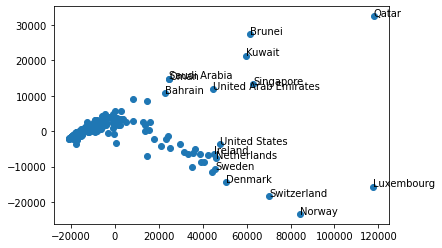

In [31]:
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

names = df['country']
res = sk.decomposition.PCA(n_components=2).fit_transform(df[features])
plt.scatter(res[:,0],res[:,1])
for n,x,y in zip(names,res[:,0],res[:,1]):
    if x>45000 or y>10000:
        plt.annotate(n,(x,y))
plt.show()

Видно, что некоторые страны сильно выделяются из общего множества. Чтобы понять, какие это страны, мы аннотируем те точки, которые находятся в более-менее свободной части графика.

Учитывая, что мы получили очень большие значение после преобразования, мы можем прийти к заключению, что хорошо бы отмасштабировать все признаки перед тем, как делать преобразование координат. Для этого можем использовать стандартное средство SkLearn:

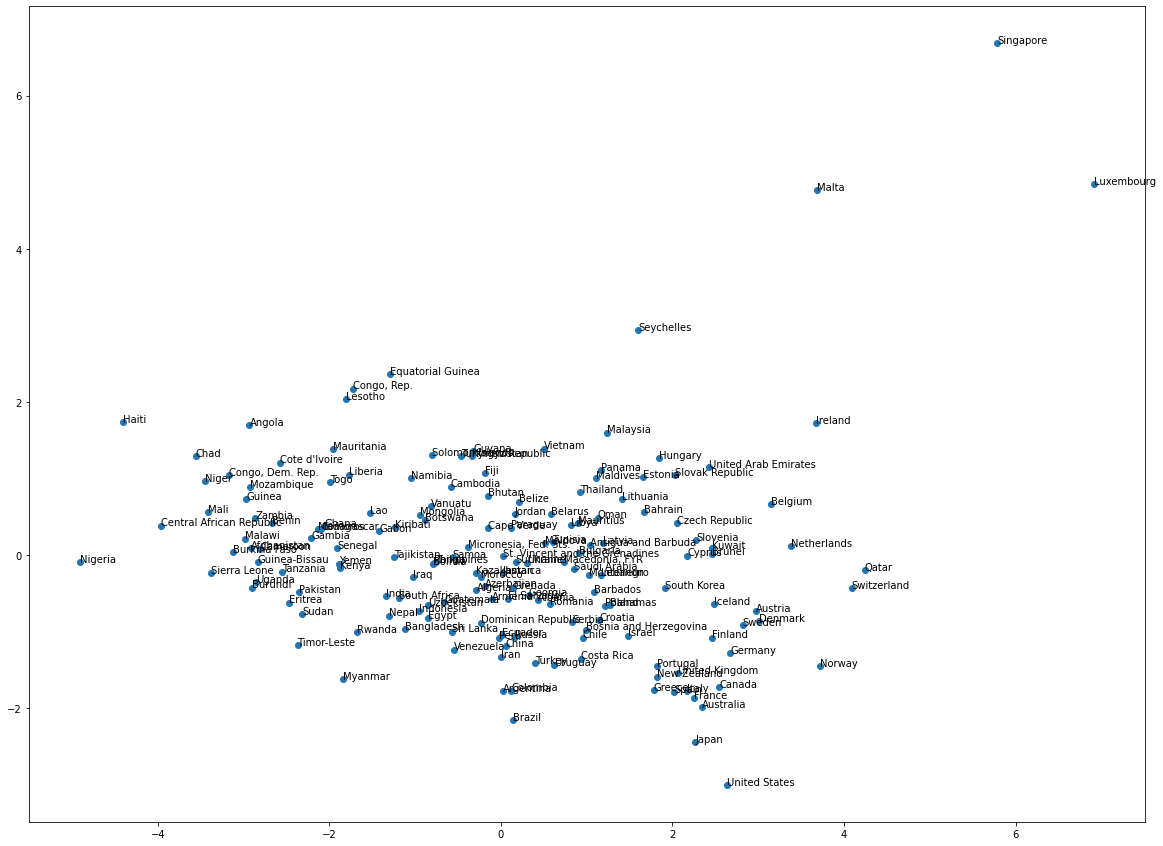

In [32]:
scaler = sk.preprocessing.StandardScaler()
dfs = scaler.fit_transform(df[features])

res = sk.decomposition.PCA(n_components=2).fit_transform(dfs)
plt.figure(figsize=(20,15))
plt.scatter(res[:,0],res[:,1])
for n,x,y in zip(names,res[:,0],res[:,1]):
    if True or y>2.5 or x<-4 or x>3:
        plt.annotate(n,(x,y))
plt.show()

Видим, что равномерность расположения точек стала несколько лучше, и по-прежнему выделаются те же страны (но, возможно, они находятся в другом месте, т.к. PCA не гарантирует каждый раз получение одной и той же системы координат).

Попробуем провести кластеризацию. Однако возникает вопрос - на сколько кластеров разбивать множество стран? Чтобы понять это, обычно делают несколько попыток, и смотрят на параметр **инерции** - это как раз та самая сумма расстояний до центроидов, которую мы видели в уравнении (1):

c:\winapp\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\winapp\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\winapp\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\winapp\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

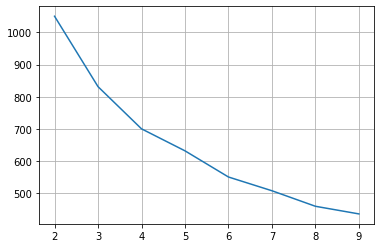

In [33]:
inertias = []
for k in range(2,10):
    km = sk.cluster.KMeans(n_clusters=k).fit(dfs)
    inertias.append(km.inertia_)

plt.plot(range(2,10),inertias)
plt.grid()

Часто бывает так, что после какого-то значения k наступает перелом в графике, после которого инерция уже не сильно снижается. В этом случае такое значение как раз можно считать оптимальным. В нашем случае можно выбрать значение 4 или 5:

In [34]:
nclusters = 7
km = sk.cluster.KMeans(n_clusters=nclusters).fit(dfs)
km.labels_

c:\winapp\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 5, 0, 2, 5, 5, 1, 1, 5, 2, 2, 5, 2, 2, 1, 2, 0, 2, 5, 2, 0,
       5, 4, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 5, 5, 0, 0, 0, 2, 0, 2, 2, 2,
       1, 5, 5, 5, 2, 0, 0, 2, 2, 1, 1, 5, 0, 2, 1, 0, 1, 2, 5, 0, 0, 2,
       0, 2, 1, 5, 5, 5, 5, 1, 1, 1, 5, 1, 2, 5, 0, 0, 4, 2, 0, 2, 2, 0,
       0, 5, 2, 3, 2, 0, 0, 2, 2, 0, 3, 0, 2, 2, 2, 5, 2, 5, 0, 5, 0, 5,
       1, 1, 0, 6, 1, 5, 0, 2, 2, 5, 5, 2, 1, 4, 5, 5, 0, 2, 5, 0, 2, 2,
       0, 3, 2, 2, 2, 0, 2, 1, 5, 2, 0, 2, 1, 1, 5, 0, 2, 0, 0, 5, 2, 5,
       5, 0, 2, 4, 1, 1, 5, 5, 2, 5, 2, 0, 0])

Найдем типичных представителей каждого из кластеров. Координаты центроидов не соответствуют конкретным точкам из датасета (странам), поэтому нам надо найти ближайшие к ним точки:

In [35]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, dfs)
names[closest]

106    Mozambique
58        Germany
24       Bulgaria
133     Singapore
82         Kuwait
47          Egypt
113       Nigeria
Name: country, dtype: object

Чтобы проделать дальнейший анализ данных, мы можем добавить информацию о кластере в исходный датафрейм:

In [36]:
df['cluster'] = km.labels_
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,5
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,5
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


Посмотрим на средние значения параметров по кластерам:

In [37]:
d = { x : 'mean' for x in features }
d['country'] = ', '.join

res = df.groupby('cluster').agg(d)
res

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
cluster,,,,,,,,,,
0,94.059091,28.357045,6.438182,43.609091,3455.522727,9.721023,58.890909,5.020455,1699.363636,"Afghanistan, Angola, Benin, Botswana, Burkina ..."
1,4.295652,40.730435,10.513478,38.247826,40265.217391,1.334913,80.891304,1.810870,45417.391304,"Australia, Austria, Belgium, Canada, Denmark, ..."
2,15.713208,49.909434,7.068868,60.137736,14165.660377,3.872226,73.654717,2.095283,8614.264151,"Albania, Antigua and Barbuda, Bahamas, Bahrain..."
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,"Luxembourg, Malta, Singapore"
4,9.725000,68.525000,2.735000,36.450000,84600.000000,11.845000,77.825000,1.997500,44775.000000,"Brunei, Kuwait, Qatar, United Arab Emirates"
5,29.220513,30.976641,5.181795,31.068356,12784.358974,12.234000,72.084615,2.583077,6024.512821,"Algeria, Argentina, Armenia, Azerbaijan, Bangl..."
6,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000,Nigeria


Можем посмотреть на интересные закономерности: например, как зависит продолжительность жизни от процента расходов на здоровье:

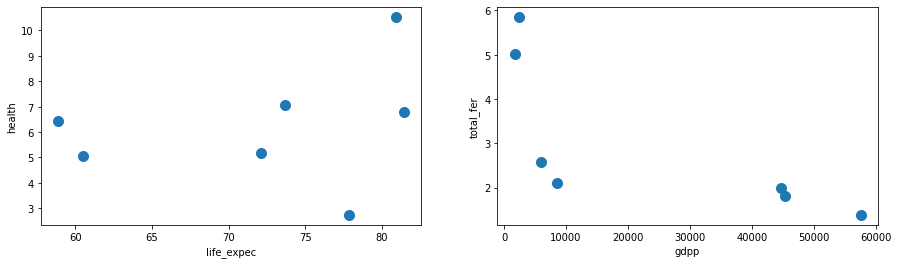

In [38]:
fig,ax = plt.subplots(1,2,figsize=(15,4)) 
res.plot.scatter('life_expec','health',s=100,ax=ax[0])
res.plot.scatter('gdpp','total_fer',s=100,ax=ax[1])
plt.show()

В заключение посмотрим на все группы стран:

In [39]:
for c,all in zip(res.index,res['country']):
    print(f"== Cluster: {c} ==\n{all}")

== Cluster: 0 ==
Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia
== Cluster: 1 ==
Australia, Austria, Belgium, Canada, Denmark, Finland, France, Germany, Greece, Iceland, Ireland, Israel, Italy, Japan, Netherlands, New Zealand, Norway, Portugal, Spain, Sweden, Switzerland, United Kingdom, United States
== Cluster: 2 ==
Albania, Antigua and Barbuda, Bahamas, Bahrain, Barbados, Belarus, Belize, Bhutan, Bosnia and Herzegovina, Bulgaria, Cambodia, Cape Verde, Chile, Costa Rica, Croatia, Cyprus, Czech Republic, El Salvador, Estonia, Fiji, Georgia, Grenada, Guyana, Hungary, Jordan, Kyrgyz Republic

**Упражнение**:
1. Поэкспериментируйте с другим числом кластеров и посмотрите, какие страны получаются
1. Попробуйте кластеризацию без предварительного масштабирования и сравните результаты
1. Попробуете использовать `MinMaxScaler` для масштабирования и сравните результаты
1. Реализуйте масштабирование признаков и кластеризацию в виде единого пайплайна (подсказка - используйте `ColumnTransformer` для масштабирования только числовых фич)